In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
annotations = pd.read_csv("../metadata/ukb23158_500k_OQFE.annotations.txt", delimiter=" ", header=None, names=["Variant", "Gene_Annotation", "Functional"])
annotations['CHROM'] = annotations['Variant'].apply(lambda x: x.split(':')[0].strip())
annotations['POS'] = annotations['Variant'].apply(lambda x: int(x.split(':')[1].split(':')[0].strip()))
annotations

,Variant,Gene_Annotation,Functional,CHROM,POS
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095
1,1:69134:A:G,OR4F5(ENSG00000186092),missense(0/5),1,69134
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173
...,...,...,...,...,...
8413748,16:1775124:C:T,EME2(ENSG00000197774),synonymous,16,1775124
8413749,16:1775133:G:A,EME2(ENSG00000197774),LoF,16,1775133
8413750,16:1775313:A:G,EME2(ENSG00000197774),LoF,16,1775313
8413751,16:1775314:G:A,EME2(ENSG00000197774),LoF,16,1775314


In [3]:
reference = pd.read_csv('../metadata/ref_vars_grch38_chr1.txt',delimiter='\t')
reference = reference.rename(columns={'ANCESTRAL':'REFERENCE_GRCH38','CHR':'CHROM'})
reference

,CHROM,POS,REFERENCE_GRCH38
0,1,1,N
1,1,2,N
2,1,3,N
3,1,4,N
4,1,5,N
...,...,...,...
248956417,1,248956418,N
248956418,1,248956419,N
248956419,1,248956420,N
248956420,1,248956421,N


In [4]:
ancestral = pd.read_csv("../metadata/ancestral_vars_chr1.txt",delimiter='\t')
ancestral = ancestral.rename(columns={'CHR':'CHROM'})
ancestral

,CHROM,POS,ANCESTRAL
0,1,1,.
1,1,2,.
2,1,3,.
3,1,4,.
4,1,5,.
...,...,...,...
248956417,1,248956418,.
248956418,1,248956419,.
248956419,1,248956420,.
248956420,1,248956421,.


In [5]:
annotations['CHROM']=annotations['CHROM'].astype(int)
reference['CHROM']=reference['CHROM'].astype(int)
ancestral['CHROM']=ancestral['CHROM'].astype(int)

In [6]:
ancestral["ANCESTRAL"] = ancestral["ANCESTRAL"].str.upper()  # Ensure uppercase
ancestral = ancestral[~ancestral["ANCESTRAL"].isin(["N", ".", "-"])]  # Remove unwanted values

In [7]:
ancestral

,CHROM,POS,ANCESTRAL
12622,1,12623,A
12623,1,12624,T
12624,1,12625,G
12625,1,12626,C
12626,1,12627,C
...,...,...,...
248931574,1,248931575,G
248931575,1,248931576,C
248931577,1,248931578,A
248931578,1,248931579,T


In [8]:
df = annotations.merge(reference, on=["CHROM", "POS"], suffixes=("", "_grch38"))
df = df.merge(ancestral, on=["CHROM", "POS"])

In [9]:
df

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A
...,...,...,...,...,...,...,...
809308,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G
809309,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G
809310,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G
809311,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G


In [10]:
df[["chrom", "pos", "A2", "A1"]] = df["Variant"].str.split(":", expand=True)
df["pos"] = df["pos"].astype(int)
valid_bases = {"A", "T", "C", "G"}
df = df[df["A2"].isin(valid_bases) & df["A1"].isin(valid_bases)]
df

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G
...,...,...,...,...,...,...,...,...,...,...,...
809308,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A
809309,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A
809310,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T
809311,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A


In [11]:
df[df['REFERENCE_GRCH38']==df['ANCESTRAL']]

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G
...,...,...,...,...,...,...,...,...,...,...,...
809308,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A
809309,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A
809310,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T
809311,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A


In [51]:
df[df['REFERENCE_GRCH38']!=df['ANCESTRAL']]

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1
414,1:941172:G:A,SAMD11(ENSG00000187634),missense(>=1/5),1,941172,G,A,1,941172,G,A
534,1:942451:T:C,SAMD11(ENSG00000187634),missense(0/5),1,942451,T,C,1,942451,T,C
733,1:942930:T:C,SAMD11(ENSG00000187634),missense(0/5),1,942930,T,C,1,942930,T,C
798,1:943273:A:G,SAMD11(ENSG00000187634),missense(0/5),1,943273,A,G,1,943273,A,G
860,1:943765:A:C,SAMD11(ENSG00000187634),missense(0/5),1,943765,A,C,1,943765,A,C
...,...,...,...,...,...,...,...,...,...,...,...
808439,1:156294517:A:G,GLMP(ENSG00000198715),synonymous,1,156294517,A,G,1,156294517,A,G
808793,1:161163003:G:A,USP21(ENSG00000143258),synonymous,1,161163003,G,A,1,161163003,G,A
808853,1:161226594:T:C,TOMM40L(ENSG00000158882),synonymous,1,161226594,T,G,1,161226594,T,C
809109,1:209783395:A:C,C1orf74(ENSG00000162757),synonymous,1,209783395,A,G,1,209783395,A,C


In [12]:
df[df['REFERENCE_GRCH38']==df['A2']]

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G
...,...,...,...,...,...,...,...,...,...,...,...
809308,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A
809309,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A
809310,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T
809311,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A


In [13]:
df[df['REFERENCE_GRCH38']!=df['A2']]

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1


In [14]:
df['CHROM'] = df['CHROM'].astype(int)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/3268630664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CHROM'] = df['CHROM'].astype(int)


In [15]:
df['CHROM'].value_counts()

CHROM
1    788736
Name: count, dtype: int64

In [16]:
df

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G
...,...,...,...,...,...,...,...,...,...,...,...
809308,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A
809309,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A
809310,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T
809311,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A


In [17]:
df["status"] = df.apply(
    lambda row: "AncRef" if row["ANCESTRAL"] == row["REFERENCE_GRCH38"]
    else ("DerRef" if row["A1"] == row["ANCESTRAL"] else "other"),
    axis=1
)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/1000630705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["status"] = df.apply(


In [ ]:
# df["status"] = df.apply(
#     lambda row: "DerRef" if row["REFERENCE_GRCH38"] != row["ANCESTRAL"] else "AncRef",
#     axis=1
# )

In [18]:
df

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef
...,...,...,...,...,...,...,...,...,...,...,...,...
809308,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef
809309,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef
809310,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef
809311,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef


In [74]:
# sum(df['A2']!=df['REFERENCE_GRCH38'])

In [19]:
df['status'].value_counts()

status
AncRef    784414
DerRef      3221
other       1101
Name: count, dtype: int64

In [20]:
df[df['status']=='other']

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status
2160,1:1040777:T:C,AGRN(ENSG00000188157),synonymous,1,1040777,T,G,1,1040777,T,C,other
2594,1:1043866:C:T,AGRN(ENSG00000188157),synonymous,1,1043866,C,G,1,1043866,C,T,other
3234,1:1048063:G:A,AGRN(ENSG00000188157),missense(0/5),1,1048063,G,T,1,1048063,G,A,other
3711,1:1051300:C:T,AGRN(ENSG00000188157),synonymous,1,1051300,C,G,1,1051300,C,T,other
4475,1:1087195:G:A,C1orf159(ENSG00000131591),missense(0/5),1,1087195,G,C,1,1087195,G,A,other
...,...,...,...,...,...,...,...,...,...,...,...,...
806479,1:43991943:G:A,SLC6A9(ENSG00000196517),missense(>=1/5),1,43991943,G,C,1,43991943,G,A,other
807174,1:145960571:T:C,ANKRD34A(ENSG00000272031),missense(0/5),1,145960571,T,G,1,145960571,T,C,other
808853,1:161226594:T:C,TOMM40L(ENSG00000158882),synonymous,1,161226594,T,G,1,161226594,T,C,other
809109,1:209783395:A:C,C1orf74(ENSG00000162757),synonymous,1,209783395,A,G,1,209783395,A,C,other


In [21]:
frequency = pd.read_csv('../data/chr1_ukb_all.frqx',delimiter='\t')

In [22]:
frequency

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
0,1,1:69026:T:G,G,T,0,2,469630,0,0,203
1,1,1:69081:G:C,C,G,177,2438,462237,0,0,4983
2,1,1:69095:T:G,G,T,0,2,469266,0,0,567
3,1,1:69134:A:G,G,A,7,227,467530,0,0,2071
4,1,1:69144:C:T,T,C,0,2,468214,0,0,1619
...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,3,469681,0,0,151
2492815,1,1:248918452:A:G,G,A,0,1,469351,0,0,483
2492816,1,1:248918455:G:T,T,G,0,2,469123,0,0,710
2492817,1,1:248918458:C:T,T,C,0,3,468740,0,0,1092


In [23]:
frequency['FRQ_A1'] = (2 * frequency['C(HOM A1)'] + frequency['C(HET)']) / (2 * (frequency['C(HOM A1)'] + frequency['C(HET)'] + frequency['C(HOM A2)']))
frequency['FRQ_A2'] = (2 * frequency['C(HOM A2)'] + frequency['C(HET)']) / (2 * (frequency['C(HOM A1)'] + frequency['C(HET)'] + frequency['C(HOM A2)']))

In [24]:
frequency

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING),FRQ_A1,FRQ_A2
0,1,1:69026:T:G,G,T,0,2,469630,0,0,203,0.000002,0.999998
1,1,1:69081:G:C,C,G,177,2438,462237,0,0,4983,0.003003,0.996997
2,1,1:69095:T:G,G,T,0,2,469266,0,0,567,0.000002,0.999998
3,1,1:69134:A:G,G,A,7,227,467530,0,0,2071,0.000258,0.999742
4,1,1:69144:C:T,T,C,0,2,468214,0,0,1619,0.000002,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,3,469681,0,0,151,0.000003,0.999997
2492815,1,1:248918452:A:G,G,A,0,1,469351,0,0,483,0.000001,0.999999
2492816,1,1:248918455:G:T,T,G,0,2,469123,0,0,710,0.000002,0.999998
2492817,1,1:248918458:C:T,T,C,0,3,468740,0,0,1092,0.000003,0.999997


In [25]:
# frequency.rename(columns={'CHR': 'CHROM'}, inplace=True)
frequency[['CHROM', 'POS', 'A2_SNP', 'A1_SNP']] = frequency['SNP'].str.split(':', expand=True)
frequency

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING),FRQ_A1,FRQ_A2,CHROM,POS,A2_SNP,A1_SNP
0,1,1:69026:T:G,G,T,0,2,469630,0,0,203,0.000002,0.999998,1,69026,T,G
1,1,1:69081:G:C,C,G,177,2438,462237,0,0,4983,0.003003,0.996997,1,69081,G,C
2,1,1:69095:T:G,G,T,0,2,469266,0,0,567,0.000002,0.999998,1,69095,T,G
3,1,1:69134:A:G,G,A,7,227,467530,0,0,2071,0.000258,0.999742,1,69134,A,G
4,1,1:69144:C:T,T,C,0,2,468214,0,0,1619,0.000002,0.999998,1,69144,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,3,469681,0,0,151,0.000003,0.999997,1,248918446,T,G
2492815,1,1:248918452:A:G,G,A,0,1,469351,0,0,483,0.000001,0.999999,1,248918452,A,G
2492816,1,1:248918455:G:T,T,G,0,2,469123,0,0,710,0.000002,0.999998,1,248918455,G,T
2492817,1,1:248918458:C:T,T,C,0,3,468740,0,0,1092,0.000003,0.999997,1,248918458,C,T


In [26]:
frequency['CHROM']=frequency['CHROM'].astype(int)
frequency['POS'] = frequency['POS'].astype(int)

In [27]:
df_freq = df.merge(frequency[['CHROM', 'POS', 'A1', 'A2', 'FRQ_A1','FRQ_A2']], on=['CHROM', 'POS', 'A1', 'A2'], how='left')

In [28]:
df_freq_filt = df_freq[df_freq['status']!='other']

In [29]:
df_freq_filt

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.000002,0.999998
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.000002,0.999998
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.000041,0.999959
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.000002,0.999998
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.000002,0.999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.000001,0.999999
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.000003,0.999997
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.000004,0.999996
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.000001,0.999999


In [30]:
df_freq_filt['DAF'] = df_freq_filt.apply(
    lambda row: row['FRQ_A1'] if row['A1'] != row['ANCESTRAL'] else row['FRQ_A2'],
    axis=1
)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/2744721199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_filt['DAF'] = df_freq_filt.apply(


In [31]:
df_freq_filt['DAF'].min()

1.0642033905520024e-06

In [32]:
df_freq_filt['DAF'].max()

0.9999989357966095

In [33]:
df_freq_filt[df_freq_filt['DAF']>0.5]['status'].value_counts()

status
DerRef    2724
Name: count, dtype: int64

In [34]:
df_freq_filt[df_freq_filt['DAF']<0.5]['status'].value_counts()

status
AncRef    784025
Name: count, dtype: int64

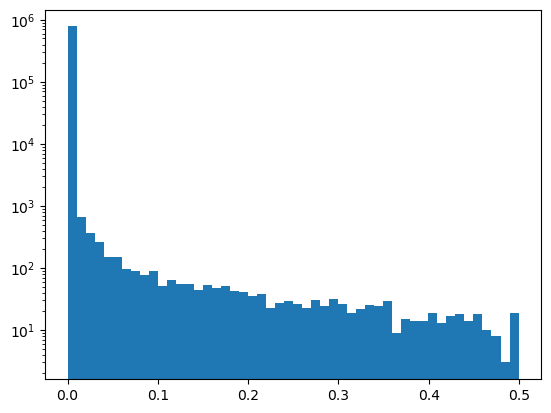

In [35]:
plt.hist(df_freq_filt[df_freq_filt['status']=="AncRef"]['DAF'],bins=50)
plt.yscale('log')

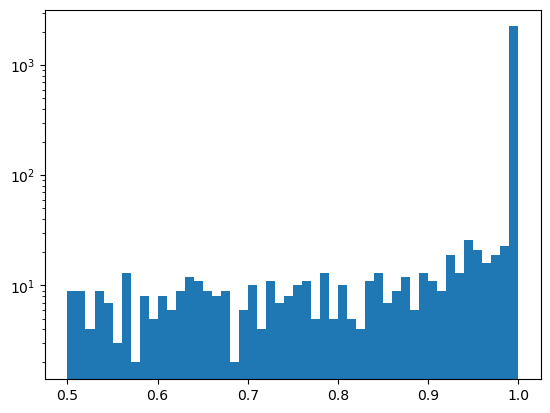

In [36]:
plt.hist(df_freq_filt[df_freq_filt['status']=="DerRef"]['DAF'],bins=50)
plt.yscale('log')

In [107]:
frequency_WB = pd.read_csv('../data/chr1_ukb_WB_kar.frqx',delimiter='\t')
frequency_WB['FRQ_A1'] = (2 * frequency_WB['C(HOM A1)'] + frequency_WB['C(HET)']) / (2 * (frequency_WB['C(HOM A1)'] + frequency_WB['C(HET)'] + frequency_WB['C(HOM A2)']))
frequency_WB['FRQ_A2'] = (2 * frequency_WB['C(HOM A2)'] + frequency_WB['C(HET)']) / (2 * (frequency_WB['C(HOM A1)'] + frequency_WB['C(HET)'] + frequency_WB['C(HOM A2)']))
# frequency.rename(columns={'CHR': 'CHROM'}, inplace=True)
frequency_WB[['CHROM', 'POS', 'A2_SNP', 'A1_SNP']] = frequency_WB['SNP'].str.split(':', expand=True)
frequency_WB['CHROM']=frequency_WB['CHROM'].astype(int)
frequency_WB['POS'] = frequency_WB['POS'].astype(int)
frequency_WB

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING),FRQ_A1,FRQ_A2,CHROM,POS,A2_SNP,A1_SNP
0,1,1:69026:T:G,G,T,0,0,1000,0,0,0,0.000000,1.000000,1,69026,T,G
1,1,1:69081:G:C,C,G,1,4,989,0,0,6,0.003018,0.996982,1,69081,G,C
2,1,1:69095:T:G,G,T,0,0,999,0,0,1,0.000000,1.000000,1,69095,T,G
3,1,1:69134:A:G,G,A,0,0,995,0,0,5,0.000000,1.000000,1,69134,A,G
4,1,1:69144:C:T,T,C,0,0,995,0,0,5,0.000000,1.000000,1,69144,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,0,1000,0,0,0,0.000000,1.000000,1,248918446,T,G
2492815,1,1:248918452:A:G,G,A,0,0,1000,0,0,0,0.000000,1.000000,1,248918452,A,G
2492816,1,1:248918455:G:T,T,G,0,0,999,0,0,1,0.000000,1.000000,1,248918455,G,T
2492817,1,1:248918458:C:T,T,C,0,0,996,0,0,4,0.000000,1.000000,1,248918458,C,T


In [108]:
df_freq_WB = df.merge(frequency_WB[['CHROM', 'POS', 'A1', 'A2', 'FRQ_A1','FRQ_A2']], on=['CHROM', 'POS', 'A1', 'A2'], how='left')

In [109]:
df_freq_WB_filt = df_freq_WB[df_freq_WB['status']!='other']
df_freq_WB_filt['DAF'] = df_freq_WB_filt.apply(
    lambda row: row['FRQ_A1'] if row['A1'] != row['ANCESTRAL'] else row['FRQ_A2'],
    axis=1
)
df_freq_WB_filt

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/2058238970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_WB_filt['DAF'] = df_freq_WB_filt.apply(


,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2,DAF
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.0,1.0,0.0
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.0,1.0,0.0
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.0,1.0,0.0
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.0,1.0,0.0
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.0,1.0,0.0
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.0,1.0,0.0
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.0,1.0,0.0
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.0,1.0,0.0


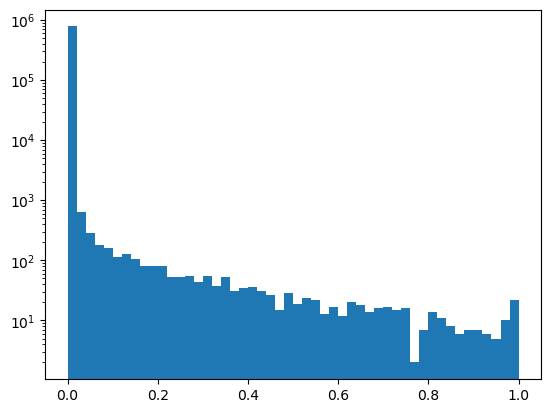

In [110]:
plt.hist(df_freq_WB_filt[df_freq_WB_filt['status']=="AncRef"]['DAF'],bins=50)
plt.yscale('log')

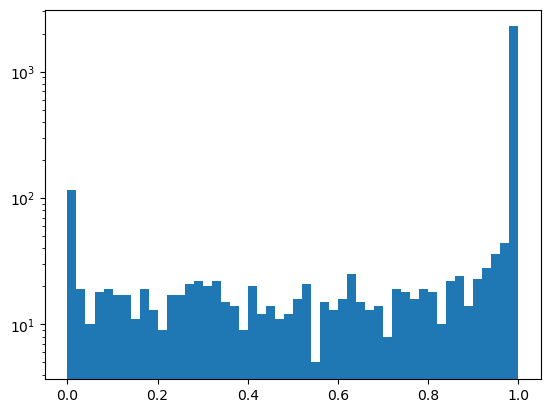

In [111]:
plt.hist(df_freq_WB_filt[df_freq_WB_filt['status']=="DerRef"]['DAF'],bins=50)
plt.yscale('log')

In [112]:
frequency_AFR = pd.read_csv('../data/chr1_ukb_AFR_kar.frqx',delimiter='\t')
frequency_AFR['FRQ_A1'] = (2 * frequency_AFR['C(HOM A1)'] + frequency_AFR['C(HET)']) / (2 * (frequency_AFR['C(HOM A1)'] + frequency_AFR['C(HET)'] + frequency_AFR['C(HOM A2)']))
frequency_AFR['FRQ_A2'] = (2 * frequency_AFR['C(HOM A2)'] + frequency_AFR['C(HET)']) / (2 * (frequency_AFR['C(HOM A1)'] + frequency_AFR['C(HET)'] + frequency_AFR['C(HOM A2)']))
# frequency.rename(columns={'CHR': 'CHROM'}, inplace=True)
frequency_AFR[['CHROM', 'POS', 'A2_SNP', 'A1_SNP']] = frequency_AFR['SNP'].str.split(':', expand=True)
frequency_AFR['CHROM']=frequency_AFR['CHROM'].astype(int)
frequency_AFR['POS'] = frequency_AFR['POS'].astype(int)
frequency_AFR

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING),FRQ_A1,FRQ_A2,CHROM,POS,A2_SNP,A1_SNP
0,1,1:69026:T:G,G,T,0,0,1000,0,0,0,0.000000,1.000000,1,69026,T,G
1,1,1:69081:G:C,C,G,0,0,996,0,0,4,0.000000,1.000000,1,69081,G,C
2,1,1:69095:T:G,G,T,0,0,999,0,0,1,0.000000,1.000000,1,69095,T,G
3,1,1:69134:A:G,G,A,0,0,999,0,0,1,0.000000,1.000000,1,69134,A,G
4,1,1:69144:C:T,T,C,0,0,995,0,0,5,0.000000,1.000000,1,69144,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,0,1000,0,0,0,0.000000,1.000000,1,248918446,T,G
2492815,1,1:248918452:A:G,G,A,0,0,996,0,0,4,0.000000,1.000000,1,248918452,A,G
2492816,1,1:248918455:G:T,T,G,0,0,999,0,0,1,0.000000,1.000000,1,248918455,G,T
2492817,1,1:248918458:C:T,T,C,0,1,996,0,0,3,0.000502,0.999498,1,248918458,C,T


In [113]:
df_freq_AFR = df.merge(frequency_AFR[['CHROM', 'POS', 'A1', 'A2', 'FRQ_A1','FRQ_A2','A1_SNP','A2_SNP']], on=['CHROM', 'POS', 'A1', 'A2'], how='left')

In [114]:
df_freq_AFR

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2,A1_SNP,A2_SNP
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.0,1.0,G,T
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.0,1.0,T,C
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.0,1.0,A,T
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.0,1.0,T,A
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.0,1.0,G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.0,1.0,A,G
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.0,1.0,A,G
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.0,1.0,T,G
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.0,1.0,A,G


In [115]:
df_freq_AFR_filt = df_freq_AFR[df_freq_AFR['status']!='other']
# df_freq_AFR_filt['DAF'] = df_freq_AFR_filt.apply(
#     lambda row: row['FRQ_A1'] if row['A1'] != row['ANCESTRAL'] else row['FRQ_A2'],
#     axis=1
# )
def compute_daf(row):
    # Ensure correct allele-frequency mapping
    if row['A1_SNP'] == row['ANCESTRAL']:
        return row['FRQ_A2']  # A2 is derived
    elif row['A2_SNP'] == row['ANCESTRAL']:
        return row['FRQ_A1']  # A1 is derived
    else:
        return None  # Handle unexpected cases

df_freq_AFR_filt['DAF'] = df_freq_AFR_filt.apply(compute_daf, axis=1)

df_freq_AFR_filt

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/1341461937.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_AFR_filt['DAF'] = df_freq_AFR_filt.apply(compute_daf, axis=1)


,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2,A1_SNP,A2_SNP,DAF
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.0,1.0,G,T,0.0
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.0,1.0,T,C,0.0
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.0,1.0,A,T,0.0
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.0,1.0,T,A,0.0
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.0,1.0,G,A,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.0,1.0,A,G,0.0
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.0,1.0,A,G,0.0
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.0,1.0,T,G,0.0
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.0,1.0,A,G,0.0


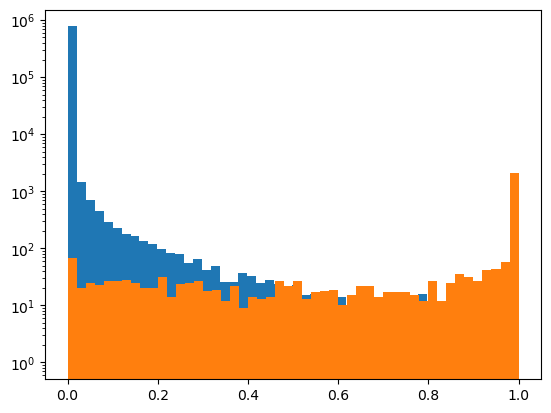

In [121]:
plt.hist(df_freq_AFR_filt[df_freq_AFR_filt['status']=="AncRef"]['DAF'],bins=50)
plt.yscale('log')

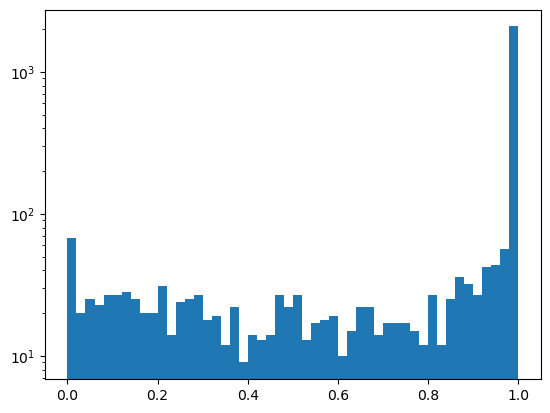

In [117]:
plt.hist(df_freq_AFR_filt[df_freq_AFR_filt['status']=="DerRef"]['DAF'],bins=50)
plt.yscale('log')

In [118]:
df_freq_AFR_filt['DAF'].mean()

0.00421305754548755

In [119]:
df_freq_WB_filt['DAF'].mean()

0.0042169785483794

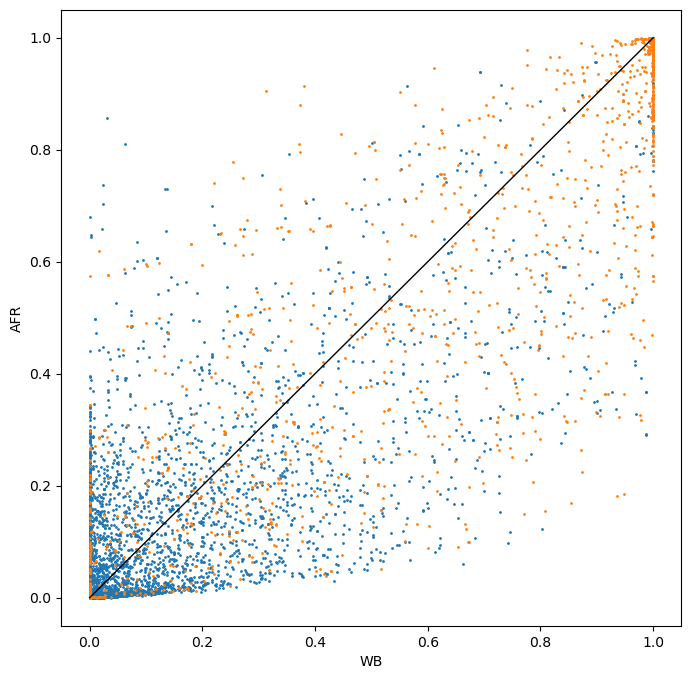

In [120]:
plt.figure(figsize=(8,8))
for status in ['AncRef','DerRef']:
    plt.scatter(df_freq_WB_filt[df_freq_WB_filt['status']==status]['DAF'],df_freq_AFR_filt[df_freq_AFR_filt['status']==status]['DAF'],s=1)
plt.plot([0, 1], [0, 1], linestyle="-", color="black", linewidth=1)
plt.xlabel('WB')
plt.ylabel('AFR')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


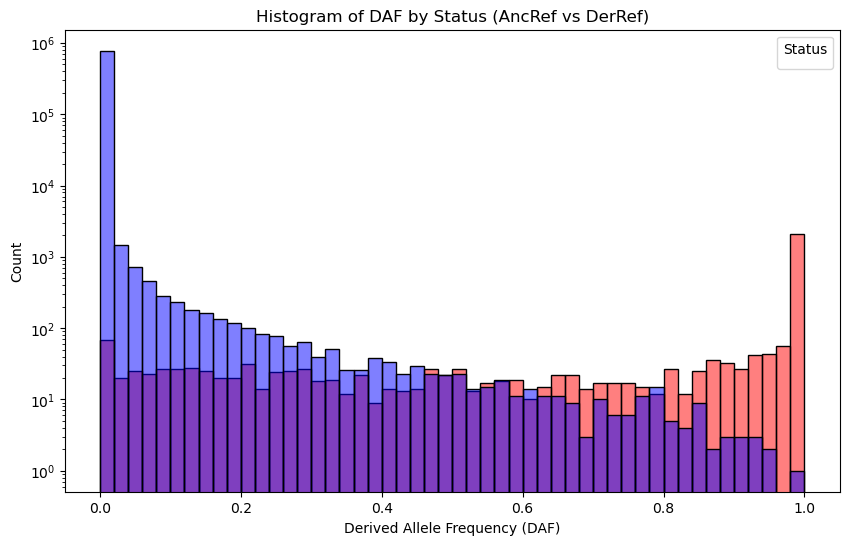

In [127]:
import seaborn as sns
# Plot the histogram
custom_colors = {'AncRef': 'blue', 'DerRef': 'red'}
plt.figure(figsize=(10, 6))
sns.histplot(data=df_freq_AFR_filt, x='DAF', hue='status', kde=False, bins=50,alpha=0.5,palette=custom_colors)

# Customize the plot
plt.title('Histogram of DAF by Status (AncRef vs DerRef)')
plt.xlabel('Derived Allele Frequency (DAF)')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.yscale('log')
# Show the plot
plt.show()

In [128]:
daf_bins = [0,0.0038,0.0076,0.015,0.031,0.061,0.12,0.18,0.31,0.46,0.61,0.78,0.84,0.92,1]
daf_labels = ['[0,0.0038)', '[0.0038,0.0076)', '[0.0076,0.015)', '[0.015,0.031)', '[0.031,0.061)', 
              '[0.061,0.12)', '[0.12,0.18)', '[0.18,0.31)', '[0.31,0.46)', '[0.46,0.61)', 
              '[0.61,0.78)', '[0.78,0.84)', '[0.84,0.92)', '[0.92,1]']


In [131]:
# df_freq_AFR_filt

In [132]:
df_freq_AFR_filt['DAF_bin'] = pd.cut(df_freq_AFR_filt['DAF'], bins=daf_bins, labels=daf_labels, right=False)
df_freq_AFR_filt

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/3873167528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_AFR_filt['DAF_bin'] = pd.cut(df_freq_AFR_filt['DAF'], bins=daf_bins, labels=daf_labels, right=False)


,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2,A1_SNP,A2_SNP,DAF,DAF_bin
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.0,1.0,G,T,0.0,"[0,0.0038)"
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.0,1.0,T,C,0.0,"[0,0.0038)"
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.0,1.0,A,T,0.0,"[0,0.0038)"
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.0,1.0,T,A,0.0,"[0,0.0038)"
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.0,1.0,G,A,0.0,"[0,0.0038)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.0,1.0,A,G,0.0,"[0,0.0038)"
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.0,1.0,A,G,0.0,"[0,0.0038)"
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.0,1.0,T,G,0.0,"[0,0.0038)"
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.0,1.0,A,G,0.0,"[0,0.0038)"


In [134]:
df_freq_AFR_filt['Functional_cat'] = df_freq_AFR_filt['Functional'].apply(
    lambda x: 'Missense' if 'mis' in x else ('Synonymous' if 'syn' in x else ('LoF' if 'LoF' in x else 'Other'))
)

colnames=['status','DAF_bin','prop_syn','prop_mis','prop_lof','num_snps']
fcat=['Synonymous','Missense','LoF']
res = pd.DataFrame(columns=colnames)
for dbin in daf_labels:
    for stat in ['AncRef','DerRef']:
        temp = df_freq_AFR_filt[(df_freq_AFR_filt['status']==stat) & (df_freq_AFR_filt['DAF_bin']==dbin)]
        allele_count = len(temp)
        if len(temp)>0:
            prop_func = temp['Functional_cat'].value_counts(normalize=True).reindex(fcat, fill_value=0).tolist() # order is Syn Mis LoF
            row = [stat,dbin,prop_func[0],prop_func[1],prop_func[2],allele_count]
        else:
            row = [stat,dbin,np.nan,np.nan,np.nan,allele_count]
        temp_df = pd.DataFrame([row], columns=colnames)
        res = pd.concat([res, temp_df], ignore_index=True)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/931913651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_AFR_filt['Functional_cat'] = df_freq_AFR_filt['Functional'].apply(
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/931913651.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, temp_df], ignore_index=True)


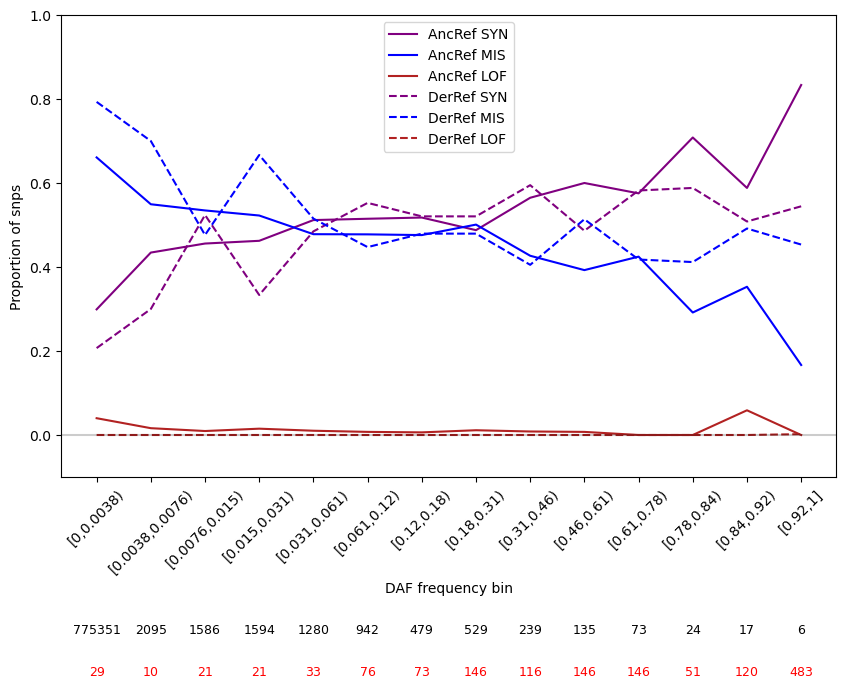

In [137]:
linestyle_map = {'AncRef':'-','DerRef':'--'}

plt.figure(figsize=(10,6))
for status in res['status'].unique():
    status_data = res[res['status'] == status]  
    plt.plot(status_data['DAF_bin'], status_data['prop_syn'], linestyle=linestyle_map[status], label=f'{status} SYN',color='purple')
    plt.plot(status_data['DAF_bin'], status_data['prop_mis'], linestyle=linestyle_map[status], label=f'{status} MIS',color='blue')
    plt.plot(status_data['DAF_bin'], status_data['prop_lof'], linestyle=linestyle_map[status], label=f'{status} LOF',color='firebrick')

for i, row in res[res['status'] == 'AncRef'].iterrows():
    plt.text(row['DAF_bin'], -0.45, str(row['num_snps']), ha='center', va='top', fontsize=9, color='black')

for i, row in res[res['status'] == 'DerRef'].iterrows():
    plt.text(row['DAF_bin'], -0.55, str(row['num_snps']), ha='center', va='top', fontsize=9, color='red')
plt.legend()
plt.ylim(-0.1,1)
plt.xticks(rotation=45)
plt.axhline(0,color='black',alpha=0.2)
plt.xlabel('DAF frequency bin')
plt.ylabel('Proportion of snps')
plt.show()

In [139]:
df_freq_WB_filt['DAF_bin'] = pd.cut(df_freq_WB_filt['DAF'], bins=daf_bins, labels=daf_labels, right=False)
# df_freq_AFR_filt
df_freq_WB_filt['Functional_cat'] = df_freq_WB_filt['Functional'].apply(
    lambda x: 'Missense' if 'mis' in x else ('Synonymous' if 'syn' in x else ('LoF' if 'LoF' in x else 'Other'))
)

colnames=['status','DAF_bin','prop_syn','prop_mis','prop_lof','num_snps']
fcat=['Synonymous','Missense','LoF']
res = pd.DataFrame(columns=colnames)
for dbin in daf_labels:
    for stat in ['AncRef','DerRef']:
        temp = df_freq_WB_filt[(df_freq_WB_filt['status']==stat) & (df_freq_WB_filt['DAF_bin']==dbin)]
        allele_count = len(temp)
        if len(temp)>0:
            prop_func = temp['Functional_cat'].value_counts(normalize=True).reindex(fcat, fill_value=0).tolist() # order is Syn Mis LoF
            row = [stat,dbin,prop_func[0],prop_func[1],prop_func[2],allele_count]
        else:
            row = [stat,dbin,np.nan,np.nan,np.nan,allele_count]
        temp_df = pd.DataFrame([row], columns=colnames)
        res = pd.concat([res, temp_df], ignore_index=True)

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/2504616097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_WB_filt['DAF_bin'] = pd.cut(df_freq_WB_filt['DAF'], bins=daf_bins, labels=daf_labels, right=False)
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/2504616097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_freq_WB_filt['Functional_cat'] = df_freq_WB_filt['Functional'].apply(
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_4527/2504616097.py:

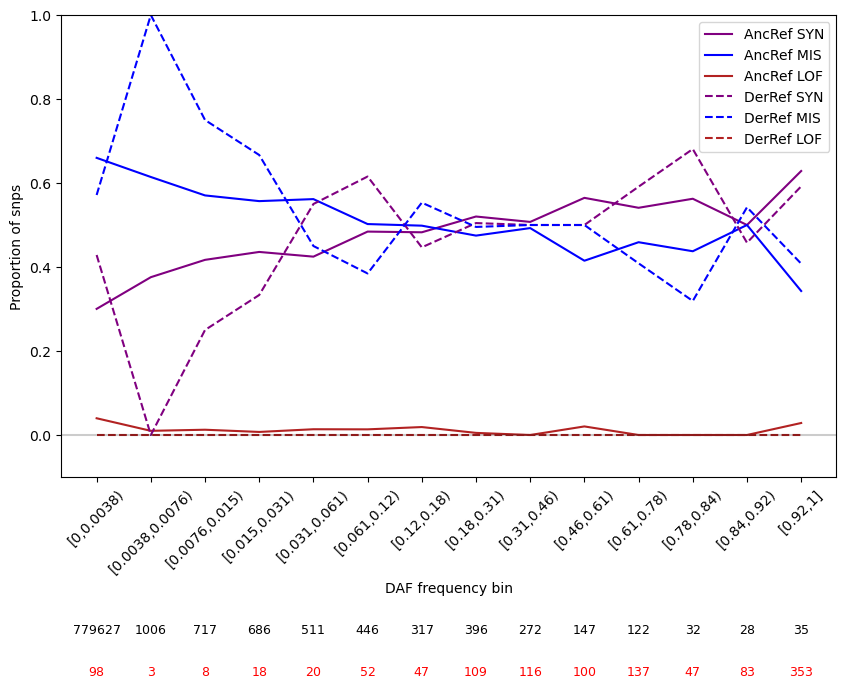

In [140]:
linestyle_map = {'AncRef':'-','DerRef':'--'}

plt.figure(figsize=(10,6))
for status in res['status'].unique():
    status_data = res[res['status'] == status]  
    plt.plot(status_data['DAF_bin'], status_data['prop_syn'], linestyle=linestyle_map[status], label=f'{status} SYN',color='purple')
    plt.plot(status_data['DAF_bin'], status_data['prop_mis'], linestyle=linestyle_map[status], label=f'{status} MIS',color='blue')
    plt.plot(status_data['DAF_bin'], status_data['prop_lof'], linestyle=linestyle_map[status], label=f'{status} LOF',color='firebrick')

for i, row in res[res['status'] == 'AncRef'].iterrows():
    plt.text(row['DAF_bin'], -0.45, str(row['num_snps']), ha='center', va='top', fontsize=9, color='black')

for i, row in res[res['status'] == 'DerRef'].iterrows():
    plt.text(row['DAF_bin'], -0.55, str(row['num_snps']), ha='center', va='top', fontsize=9, color='red')
plt.legend()
plt.ylim(-0.1,1)
plt.xticks(rotation=45)
plt.axhline(0,color='black',alpha=0.2)
plt.xlabel('DAF frequency bin')
plt.ylabel('Proportion of snps')
plt.show()

In [142]:
frequency_AFR_kar = pd.read_csv('../data/chr1_ukb_AFR_kar.frqx',delimiter='\t')
frequency_AFR_og = pd.read_csv('../data/chr1_ukb_AFR.frqx',delimiter='\t')

In [143]:
frequency_AFR_kar

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
0,1,1:69026:T:G,G,T,0,0,1000,0,0,0
1,1,1:69081:G:C,C,G,0,0,996,0,0,4
2,1,1:69095:T:G,G,T,0,0,999,0,0,1
3,1,1:69134:A:G,G,A,0,0,999,0,0,1
4,1,1:69144:C:T,T,C,0,0,995,0,0,5
...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,0,1000,0,0,0
2492815,1,1:248918452:A:G,G,A,0,0,996,0,0,4
2492816,1,1:248918455:G:T,T,G,0,0,999,0,0,1
2492817,1,1:248918458:C:T,T,C,0,1,996,0,0,3


In [144]:
frequency_AFR_og

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
0,1,1:69026:T:G,G,T,0,0,1000,0,0,0
1,1,1:69081:G:C,C,G,0,0,996,0,0,4
2,1,1:69095:T:G,G,T,0,0,999,0,0,1
3,1,1:69134:A:G,G,A,0,0,999,0,0,1
4,1,1:69144:C:T,T,C,0,0,995,0,0,5
...,...,...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0,0,1000,0,0,0
2492815,1,1:248918452:A:G,G,A,0,0,996,0,0,4
2492816,1,1:248918455:G:T,T,G,0,0,999,0,0,1
2492817,1,1:248918458:C:T,T,C,0,1,996,0,0,3


In [145]:
differences = frequency_AFR_kar != frequency_AFR_og

# Print rows where there are differences
differences_rows = differences.any(axis=1)  # Find rows where any column is different
different_rows = frequency_AFR_kar[differences_rows]
different_rows

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
528,1,1:930939:G:A,A,G,742,226,16,0,0,16
1232,1,1:941119:A:G,G,A,793,197,9,0,0,1
1576,1,1:942335:C:G,G,C,629,311,43,0,0,17
1664,1,1:942451:T:C,C,T,998,0,0,0,0,2
2973,1,1:944296:G:A,A,G,636,337,27,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2488446,1,1:248650751:T:A,A,T,152,713,94,0,0,41
2488462,1,1:248650779:A:C,C,A,621,321,22,0,0,36
2488487,1,1:248650825:G:A,A,G,120,792,46,0,0,42
2490979,1,1:248855287:T:C,C,T,693,258,41,0,0,8


In [193]:
different_rows = frequency_AFR_og[differences_rows]
different_rows

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
528,1,1:930939:G:A,G,A,16,226,742,0,0,16
1232,1,1:941119:A:G,A,G,9,197,793,0,0,1
1576,1,1:942335:C:G,C,G,43,311,629,0,0,17
1664,1,1:942451:T:C,T,C,0,0,998,0,0,2
2973,1,1:944296:G:A,G,A,27,337,636,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2488446,1,1:248650751:T:A,T,A,94,713,152,0,0,41
2488462,1,1:248650779:A:C,A,C,22,321,621,0,0,36
2488487,1,1:248650825:G:A,G,A,46,792,120,0,0,42
2490979,1,1:248855287:T:C,T,C,41,258,693,0,0,8


In [168]:
df_freq_AFR_filt

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2,A1_SNP,A2_SNP,DAF,DAF_bin,Functional_cat
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.0,1.0,G,T,0.0,"[0,0.0038)",Missense
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.0,1.0,T,C,0.0,"[0,0.0038)",Synonymous
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.0,1.0,A,T,0.0,"[0,0.0038)",Missense
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.0,1.0,T,A,0.0,"[0,0.0038)",Missense
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.0,1.0,G,A,0.0,"[0,0.0038)",Missense
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.0,1.0,A,G,0.0,"[0,0.0038)",Synonymous
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.0,1.0,A,G,0.0,"[0,0.0038)",Missense
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.0,1.0,T,G,0.0,"[0,0.0038)",Missense
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.0,1.0,A,G,0.0,"[0,0.0038)",Missense


In [175]:
df_freq_filt

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status,FRQ_A1,FRQ_A2,DAF
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,T,1,69095,T,G,AncRef,0.000002,0.999998,0.000002
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,C,1,69144,C,T,AncRef,0.000002,0.999998,0.000002
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,T,1,69149,T,A,AncRef,0.000041,0.999959,0.000041
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,A,1,69173,A,T,AncRef,0.000002,0.999998,0.000002
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,A,1,69202,A,G,AncRef,0.000002,0.999998,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788731,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,G,1,156243071,G,A,AncRef,0.000001,0.999999,0.000001
788732,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,G,1,156243072,G,A,AncRef,0.000003,0.999997,0.000003
788733,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,G,1,156243076,G,T,AncRef,0.000004,0.999996,0.000004
788734,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,G,1,156243078,G,A,AncRef,0.000001,0.999999,0.000001


In [191]:
df[df['POS']==11779941]

,Variant,Gene_Annotation,Functional,CHROM,POS,REFERENCE_GRCH38,ANCESTRAL,chrom,pos,A2,A1,status
58921,1:11779941:T:C,C1orf167(ENSG00000215910),missense(0/5),1,11779941,T,C,1,11779941,T,C,DerRef


In [195]:
frequency_AFR_kar[frequency_AFR_kar['SNP']=='1:11779941:T:C']

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
237583,1,1:11779941:T:C,C,T,348,490,162,0,0,0


In [196]:
frequency_AFR_og[frequency_AFR_og['SNP']=='1:11779941:T:C']

,CHR,SNP,A1,A2,C(HOM A1),C(HET),C(HOM A2),C(HAP A1),C(HAP A2),C(MISSING)
237583,1,1:11779941:T:C,T,C,162,490,348,0,0,0
